In [1]:
# 导入工具包
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 基础数据分析

In [2]:
# 导入数据库
data = pd.read_csv("/Users/Administrator/Desktop/tztj_revised.csv")
df = pd.DataFrame(data)
data.head(10)

,BMI,Gender,Age,Class Grade,Height_Weight_Grade,r_hengya_1,r_hengya_2,r_hengya_3,r_hengya_4,r_hengya_5,...,FeiHuoLiang,50m,LiDingTiaoYuan,ZuoWeiTiQianQu,800m,1km,YangWoQiZuo,YinTiXiangShang,luoyanyouyan,luoyanzuoyan
0,L,F,13.0,8,80.0,1.0,0.0,0.0,0.0,2.0,...,3210.0,8.60,184.0,20.0,3.46,NaN,49.0,NaN,4.1,4.4
1,M,M,14.0,8,100.0,1.0,0.0,0.0,0.0,2.0,...,3112.0,7.60,209.0,15.0,NaN,3.34,NaN,11.0,4.4,4.4
2,M,M,13.0,8,100.0,1.0,0.0,0.0,0.0,2.0,...,3025.0,7.50,222.0,15.0,NaN,3.41,NaN,0.0,5.0,4.9
3,F,F,13.0,8,60.0,1.0,0.0,0.0,0.0,2.0,...,3174.0,9.47,160.0,18.0,3.48,NaN,47.0,NaN,4.5,4.6
4,M,M,13.0,8,100.0,2.0,1.0,0.0,0.0,2.0,...,3438.0,7.80,204.0,7.0,NaN,4.18,NaN,0.0,4.3,4.2
5,F,M,13.0,8,60.0,1.0,0.0,0.0,0.0,2.0,...,4043.0,8.00,170.0,5.0,NaN,4.24,NaN,0.0,5.0,5.0
6,L,F,14.0,8,80.0,1.0,0.0,0.0,0.0,2.0,...,3093.0,10.30,155.0,4.0,3.53,NaN,50.0,NaN,4.1,4.1
7,M,F,13.0,8,100.0,2.0,1.0,0.0,0.0,2.0,...,3351.0,8.19,190.0,17.0,3.17,NaN,60.0,NaN,5.0,5.0
8,M,F,13.0,8,100.0,1.0,0.0,0.0,0.0,2.0,...,2511.0,10.04,150.0,14.0,4.02,NaN,38.0,NaN,4.0,4.0
9,L,M,13.0,8,80.0,1.0,0.0,0.0,0.0,2.0,...,3094.0,7.40,180.0,9.0,NaN,3.57,NaN,0.0,4.8,4.7


In [3]:
# 定义一个函数，判定当学生左右眼视力均大于或等于5.0时 ， 该生“不近视”并标记为“0”；否则，任意一只眼睛视力小于5.0，该生“近视”:
#其中4.9为轻度低下并标记为“1”，4.6-4.8为中度低下并标记为“2”，<=4.5为高度低下并标记为“3”。
def function(a, b): 
    if a>=5.0 and b>=5.0:
        return 0 
    elif a>=4.9 and b>=4.9:
        return 1
    elif a>=4.6 and b>=4.6:
        return 2
    else:
        return 3
#在数据列表中增加“JinShi”一列，1表示近视，0表示不近视
data['JinShi'] = data.apply(lambda x: function(x.luoyanyouyan, x.luoyanzuoyan), axis = 1) 
data.head()

,BMI,Gender,Age,Class Grade,Height_Weight_Grade,r_hengya_1,r_hengya_2,r_hengya_3,r_hengya_4,r_hengya_5,...,50m,LiDingTiaoYuan,ZuoWeiTiQianQu,800m,1km,YangWoQiZuo,YinTiXiangShang,luoyanyouyan,luoyanzuoyan,JinShi
0,L,F,13.0,8,80.0,1.0,0.0,0.0,0.0,2.0,...,8.60,184.0,20.0,3.46,NaN,49.0,NaN,4.1,4.4,3
1,M,M,14.0,8,100.0,1.0,0.0,0.0,0.0,2.0,...,7.60,209.0,15.0,NaN,3.34,NaN,11.0,4.4,4.4,3
2,M,M,13.0,8,100.0,1.0,0.0,0.0,0.0,2.0,...,7.50,222.0,15.0,NaN,3.41,NaN,0.0,5.0,4.9,1
3,F,F,13.0,8,60.0,1.0,0.0,0.0,0.0,2.0,...,9.47,160.0,18.0,3.48,NaN,47.0,NaN,4.5,4.6,3
4,M,M,13.0,8,100.0,2.0,1.0,0.0,0.0,2.0,...,7.80,204.0,7.0,NaN,4.18,NaN,0.0,4.3,4.2,3


In [15]:
count=[]
for i in range(4):
    count.append(data[data['JinShi']==i]['JinShi'].count()/data['JinShi'].count()*100)
print('样本中近视的中学生占比：%.2f%%' %(count[1]+count[2]+count[3]))

样本中近视的中学生占比：79.73%


中学生近视率将近高达80%，下面要分析一下中学生近视与其他体质体检数据方面的关系

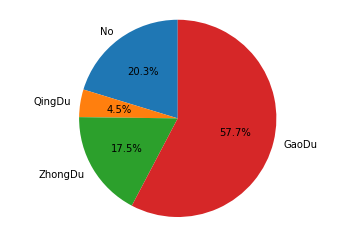

<Figure size 720x720 with 0 Axes>

In [20]:
# pie chart
plt.pie(count,labels=['No','QingDu','ZhongDu','GaoDu'],startangle=90, autopct='%.1f%%')
plt.axis('equal')
plt.figure(figsize=(10,10))
plt.show()

在所有近视的学生中，高度近视学生占比最多，达到总人数的57.7%。

## 直方图

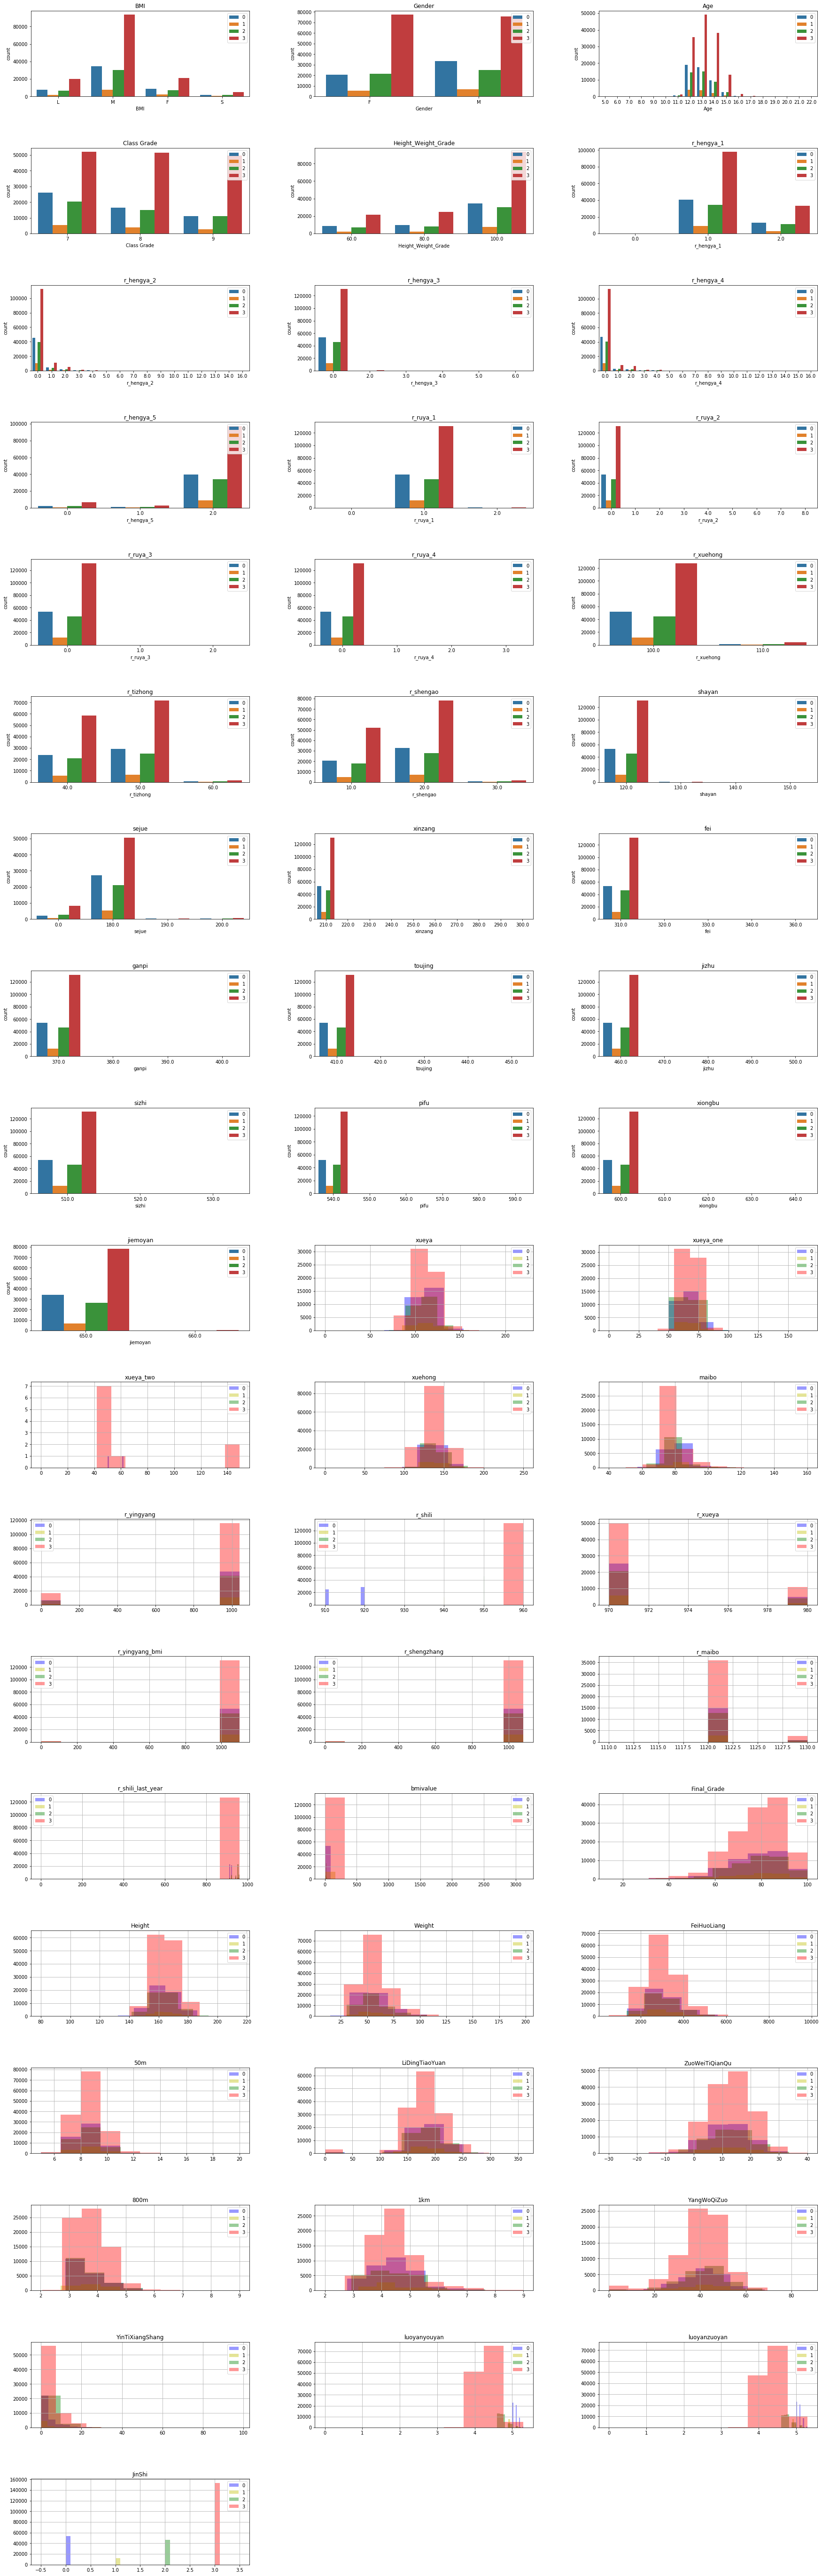

In [21]:
#  直方图分析
fig=plt.figure(figsize=(30,100))
cols=3
rows=19
for i,column in enumerate(data.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    
    if i<28:
        sns.countplot(data[column],hue=data['JinShi'],axes=ax)
        plt.legend(loc='upper right')
    
        
    else:
        colors = ['b','y','g','r']
        l = ['0','1','2','3']
        for i in range(4):
            data[data['JinShi']==i][column].hist(alpha=0.4,axes=ax,label=l[i],color=colors[i])
        #data.groupby('BMI')[column].hist(alpha=0.4,axes=ax)
        plt.legend(loc='best')
                
plt.subplots_adjust(hspace=0.6,wspace=0.3)